# 課題

授業内演習でやったシステムについて，Python-controlでゲイン線図を折れ線近似と重ねてプロットせよ．できる者は位相線図についてもプロットせよ．

授業内演習のシステムを変形する．
\begin{eqnarray}
G(s) &=& \frac{s}{(s+1)(s+10)} \nonumber 
&=& \frac{s}{10} \cdot \frac{1}{s+1} \cdot \frac{1}{0.1s+1} \nonumber
\end{eqnarray}

ここで
\begin{eqnarray}
G_1(s) = \frac{s}{10}　G_2(s) = \frac{1}{s+1}　G_3(s) = \frac{1}{0.1s+1}\nonumber
\end{eqnarray}
とする．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

In [2]:
n = [[1, 0], [1, 0]]
d = [[1, 11, 10], [10]]
P = [tf(n[0], d[0]), tf(n[1], d[1])]
w = np.logspace(-2, 3, 1000)

gain1, phase1, w = bode(P[0], w, Plot=False)
g_dB1 = 20 * np.log10(gain1)
p_deg1 = phase1 * 180 / np.pi

gain2, phase2, w = bode(P[1], w, Plot=False)
g_dB2 = 20 * np.log10(gain2)
p_deg2 = phase2 * 180 / np.pi

#G(s), G(2), G(3)
x1 = [[0.01, 1, 10, 1000], [0, 1, 1000], [0, 10, 1000]]
y1 = [[-60, -20, -20, -60], [0, 0, -60], [0, 0, -40]]

x2 = [[0.01, 0.2, 2, 5, 50, 1000], [0, 0.2, 5, 1000], [0, 2, 50, 1000]]
y2 = [[90, 90, 25, -25, -90, -90], [0, 0, -90, -90], [0, 0, -90, -90]]

C:\Users\hasuk\anaconda3\lib\site-packages\control\freqplot.py:181: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


G(1)，G(2)，G(3)の折れ線近似から求めたG(s)の折れ線近似を以下に示す．

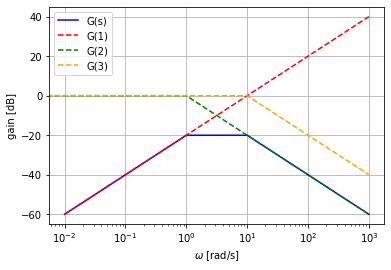

In [3]:
plt.plot(x1[0], y1[0], label="G(s)", color="blue")
plt.semilogx(w, g_dB2, label="G(1)", color="red", linestyle="--")
plt.plot(x1[1], y1[1], label="G(2)", color="green", linestyle="--")
plt.plot(x1[2], y1[2], label="G(3)", color="orange", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.legend()
plt.grid()
plt.show()

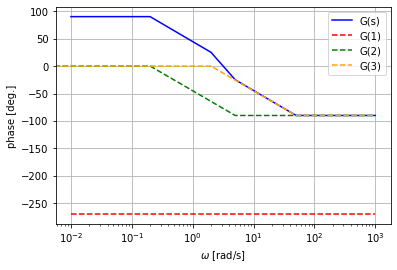

In [4]:
plt.plot(x2[0], y2[0], label="G(s)", color="blue")
plt.semilogx(w, p_deg2, label="G(1)", color="red", linestyle="--")
plt.plot(x2[1], y2[1], label="G(2)", color="green", linestyle="--")
plt.plot(x2[2], y2[2], label="G(3)", color="orange", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.legend()
plt.grid()
plt.show()

上記に示したG(s)の折れ線近似とG(s)のゲイン線図と位相線図を重ねたものを以下に示す．

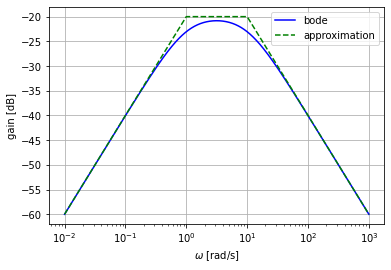

In [5]:
plt.semilogx(w, g_dB1, label="bode", color="blue")
plt.plot(x1[0], y1[0], label="approximation", color="green", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("gain [dB]")
plt.legend()
plt.grid()
plt.show()

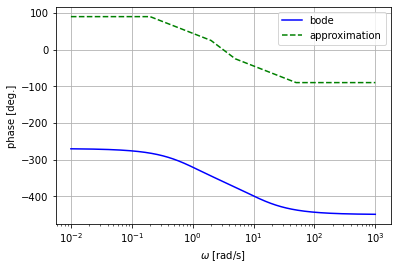

In [6]:
plt.semilogx(w, p_deg1, label="bode", color="blue")
plt.plot(x2[0], y2[0], label="approximation", color="green", linestyle="--")
plt.xlabel("$\omega $ [rad/s]")
plt.ylabel("phase [deg.]")
plt.legend()
plt.grid()
plt.show()